In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("../data/Merged_Datasets.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,geographic_area,median_income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,Wa,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,Or,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,Ks,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,Ca,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,Co,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/_1/1d6n1wt5339_g9wv2qd__brc0000gn/T/ipykernel_23075/744089824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Reds_r")
/var/folders/_1/1d6n1wt5339_g9wv2qd__brc0000gn/T/ipykernel_23075/744089824.py:8: UserWarning: Glyph 128299 (\N{PISTOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/o0_chrstphr/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128299 (\N{PISTOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


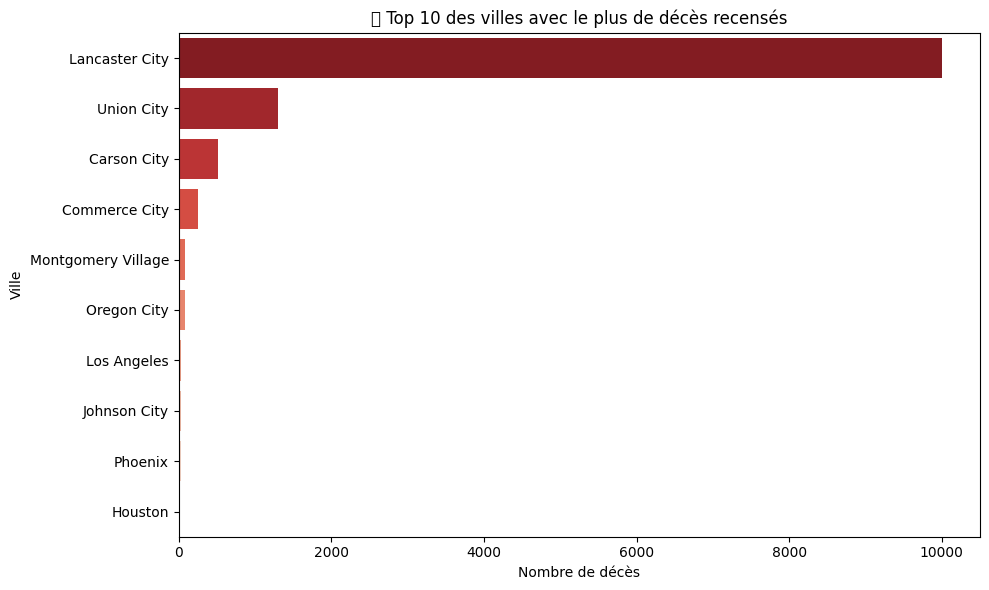

In [4]:
top_cities = df['city'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Reds_r")
plt.title("🔫 Top 10 des villes avec le plus de décès recensés")
plt.xlabel("Nombre de décès")
plt.ylabel("Ville")
plt.tight_layout()
plt.show()

/var/folders/_1/1d6n1wt5339_g9wv2qd__brc0000gn/T/ipykernel_23075/379264678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index.astype(str), y=race_counts.values, palette="pastel")
/var/folders/_1/1d6n1wt5339_g9wv2qd__brc0000gn/T/ipykernel_23075/379264678.py:9: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/o0_chrstphr/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


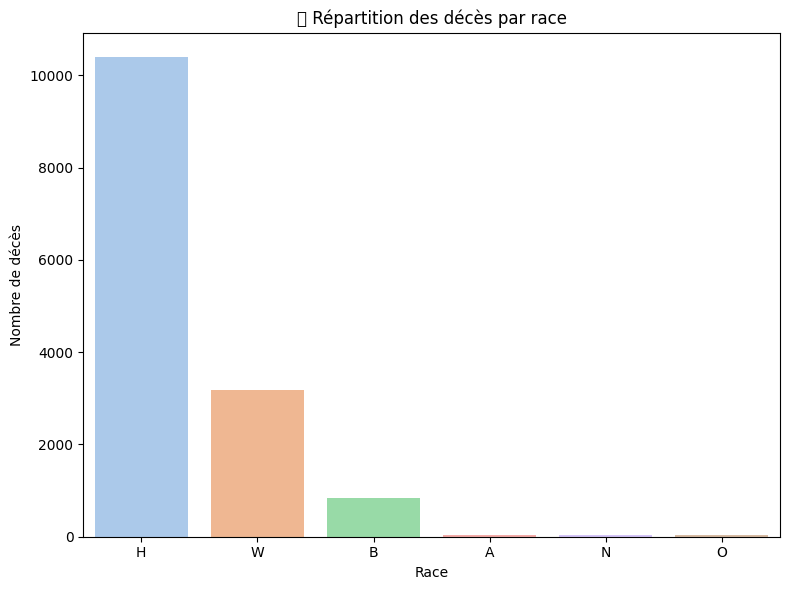

In [5]:
if 'race' in df.columns:
    race_counts = df['race'].value_counts(dropna=False)

    plt.figure(figsize=(8,6))
    sns.barplot(x=race_counts.index.astype(str), y=race_counts.values, palette="pastel")
    plt.title("👥 Répartition des décès par race")
    plt.xlabel("Race")
    plt.ylabel("Nombre de décès")
    plt.tight_layout()
    plt.show()

/Users/o0_chrstphr/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


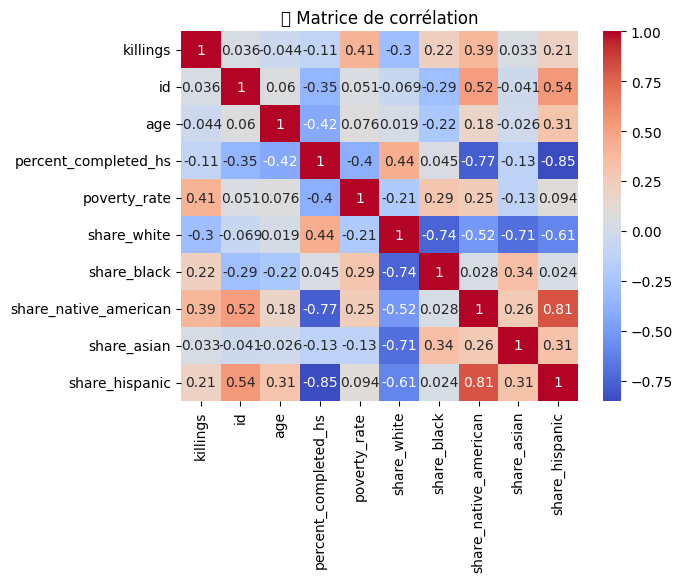

In [6]:
df_count = df.groupby("city").size().reset_index(name="killings")
df_meta = df.drop_duplicates(subset="city")
merged_corr = pd.merge(df_count, df_meta, on="city", how="left")

# Calculer les corrélations
corr = merged_corr.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("🧩 Matrice de corrélation")
plt.show()

/var/folders/_1/1d6n1wt5339_g9wv2qd__brc0000gn/T/ipykernel_23075/3963291375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="Blues_d")
/var/folders/_1/1d6n1wt5339_g9wv2qd__brc0000gn/T/ipykernel_23075/3963291375.py:9: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/o0_chrstphr/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


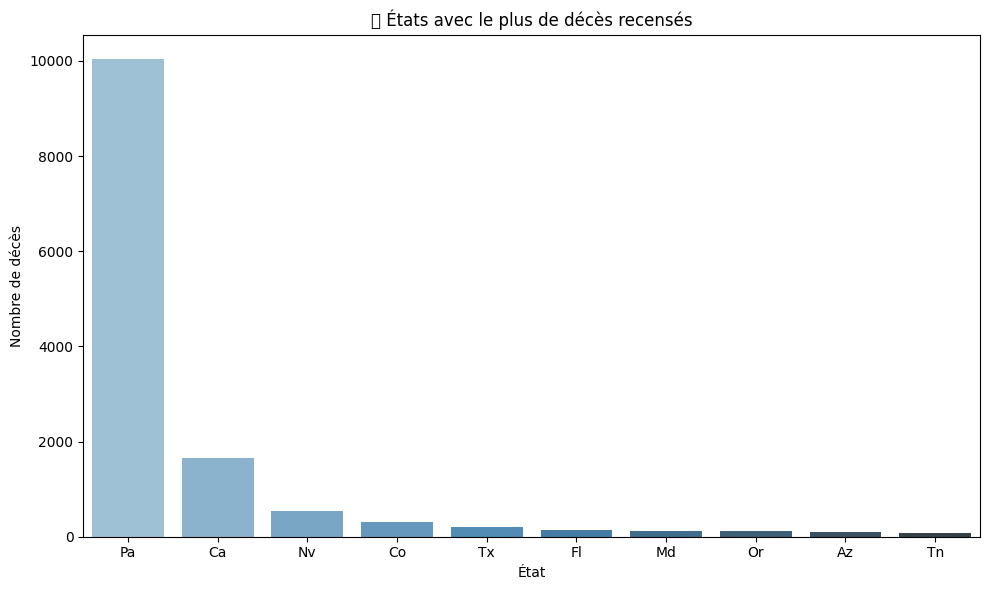

In [7]:
if 'state' in df.columns:
    top_states = df['state'].value_counts().head(10)

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_states.index, y=top_states.values, palette="Blues_d")
    plt.title("📍 États avec le plus de décès recensés")
    plt.xlabel("État")
    plt.ylabel("Nombre de décès")
    plt.tight_layout()
    plt.show()